In [71]:
import pandas as pd
import numpy as np

In [72]:
data=pd.read_csv(r"C:\Users\dell\Downloads\Zoo.csv")

In [73]:
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [74]:
x=data.drop('animal name',axis=1)

In [75]:
y=data['animal name']

In [76]:
y

0      aardvark
1      antelope
2          bass
3          bear
4          boar
         ...   
96      wallaby
97         wasp
98         wolf
99         worm
100        wren
Name: animal name, Length: 101, dtype: object

In [77]:
y.unique().shape

(100,)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
classifier=KNeighborsClassifier(n_neighbors=5,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None)

In [22]:
import seaborn as sns

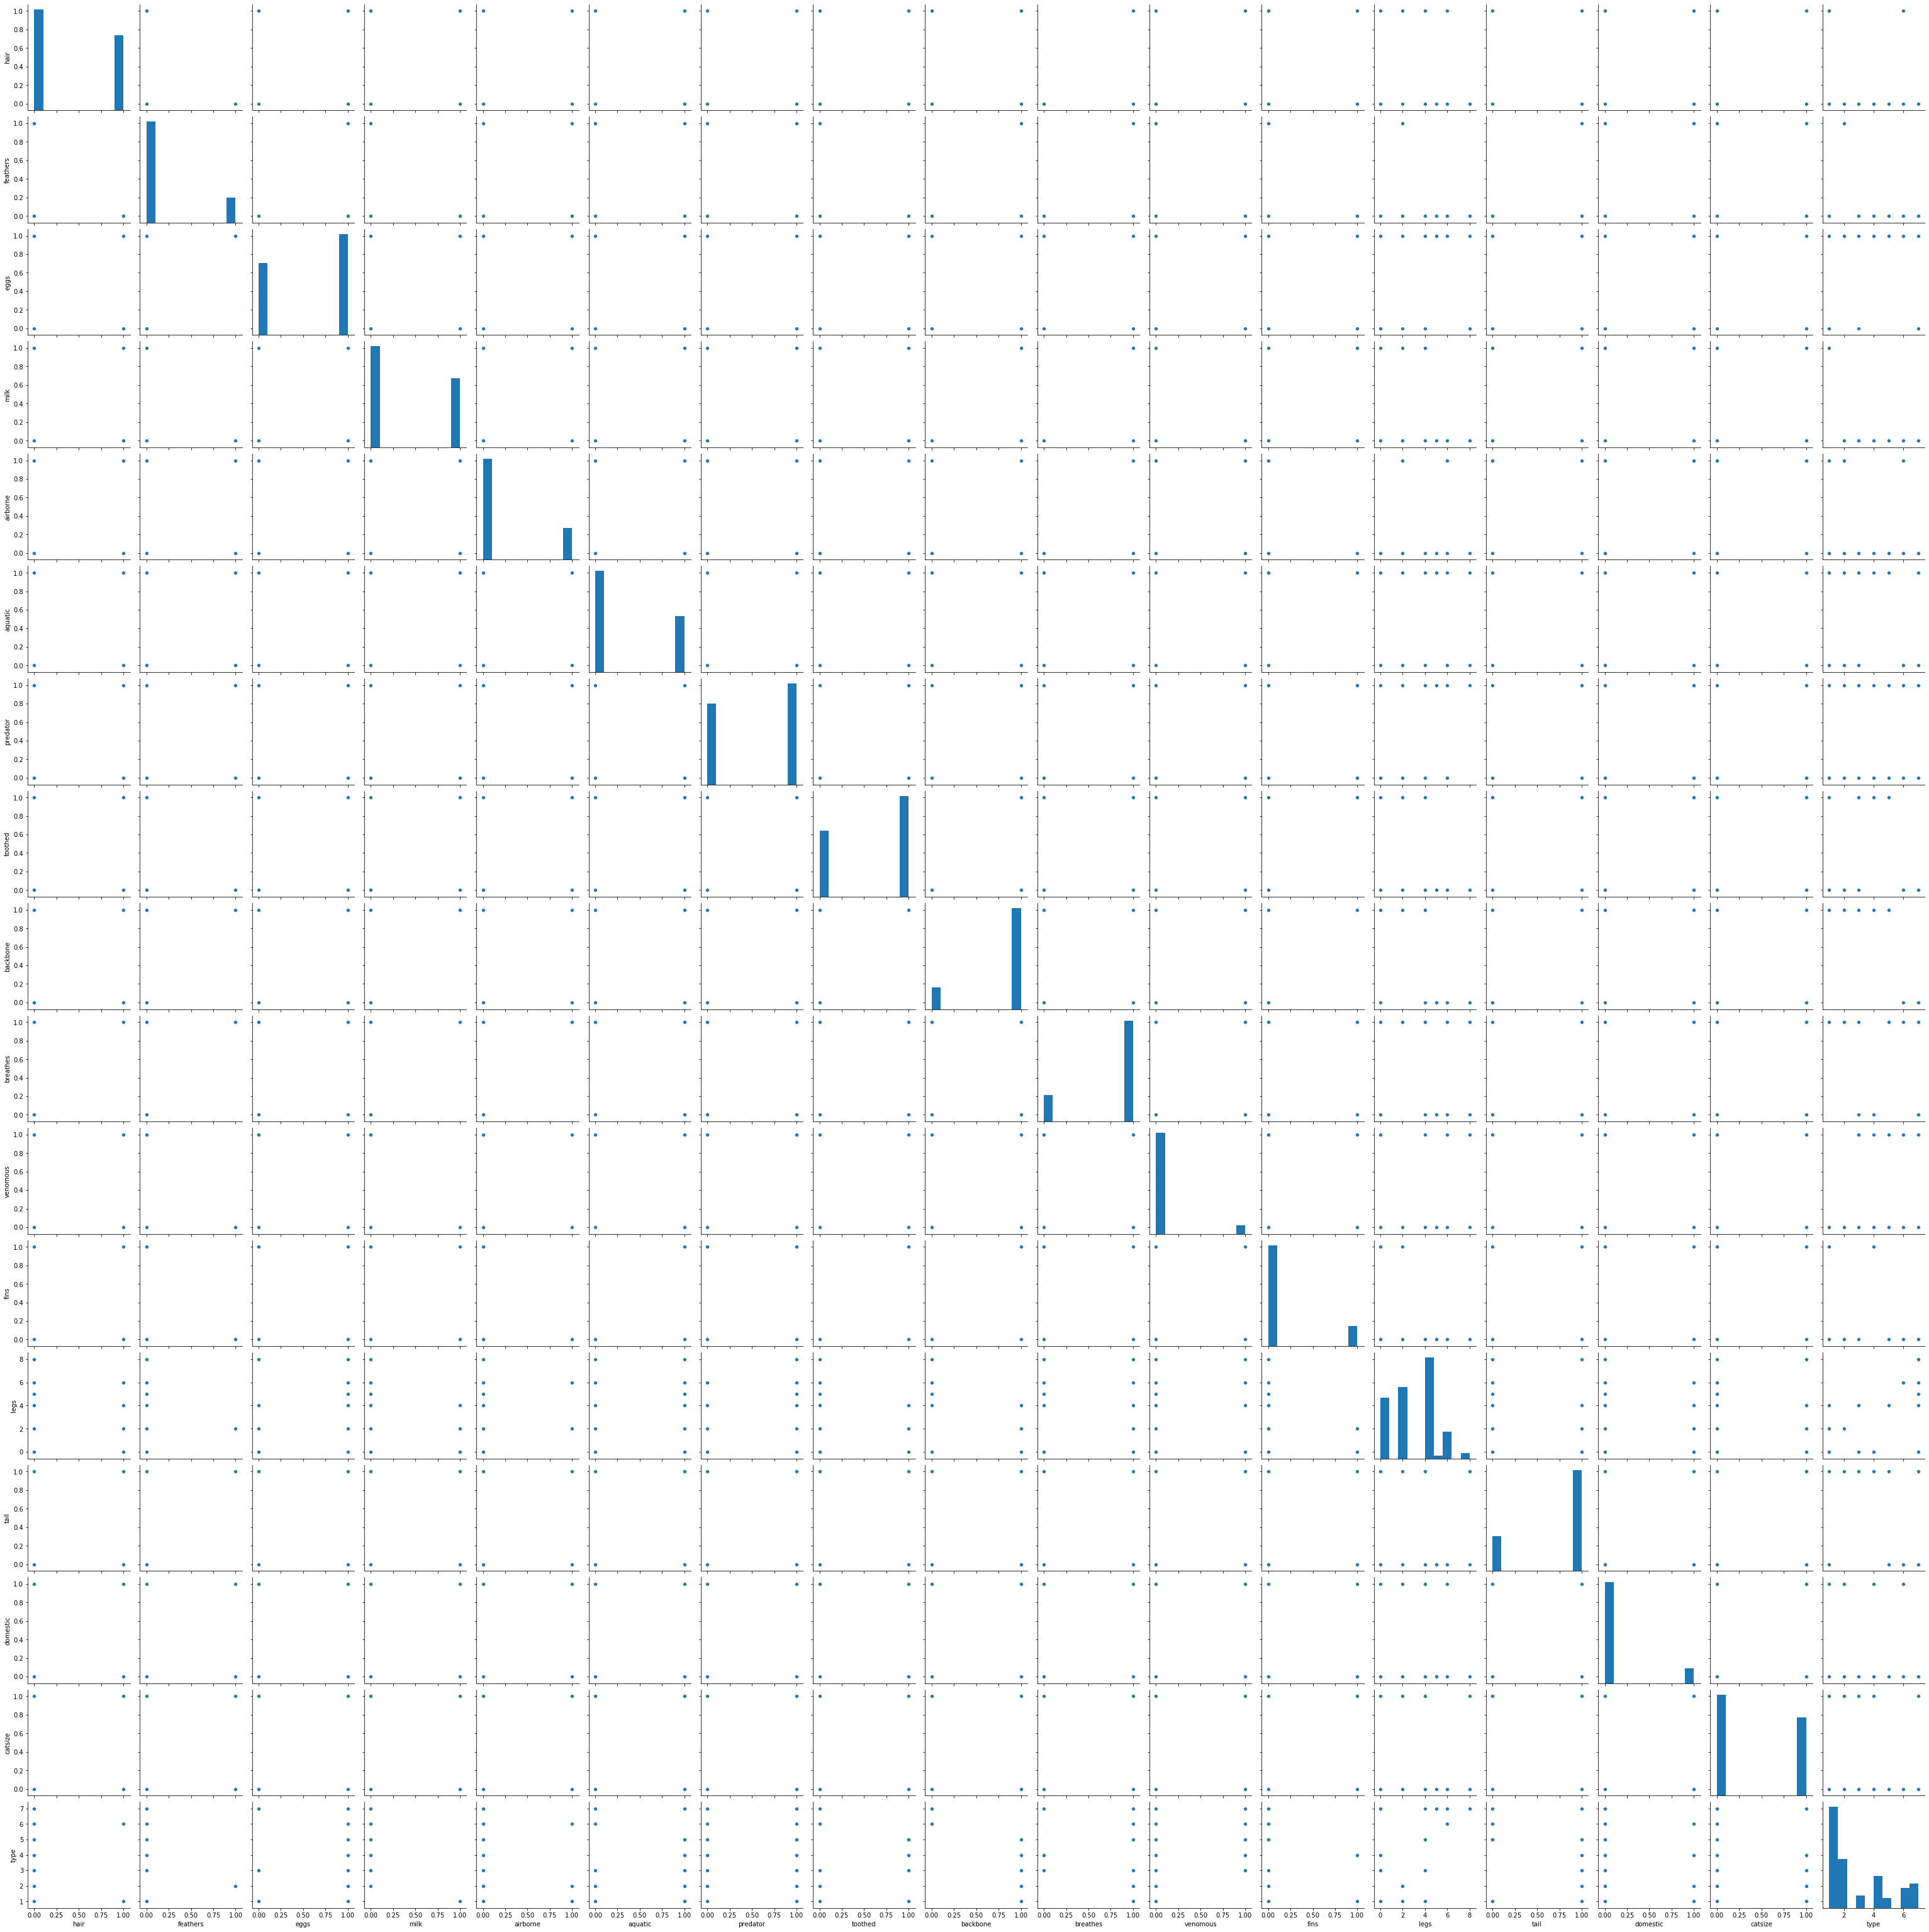

In [23]:
sns.pairplot(x)

In [85]:
from sklearn.model_selection import train_test_split

In [91]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2, random_state=42)

In [92]:
print(train_y.shape)

(80,)


In [93]:
classifier.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [94]:
classifier.score(train_x,train_y)

0.9625

In [95]:
classifier.score(test_x,test_y)

0.9523809523809523

In [78]:
from sklearn.cluster import KMeans

In [79]:
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

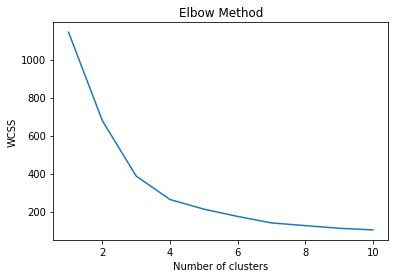

In [80]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [87]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(x)

In [88]:
y=pred_y

In [89]:
y.shape

(101,)

In [90]:
x.shape

(101, 17)

In [63]:
kmeans.cluster_centers_[:, 0]

array([ 9.50000000e-01,  2.22222222e-01, -1.11022302e-16,  4.34782609e-02])